In [3]:
import pandas as pd
import src.utils as ut

In [4]:
df = pd.read_excel("./data/InduceTime_MahnazAghajanloo_2022.xlsx")
# df = df.loc[:,"Inhibitors":"Induction delay time (min)"]
df = df[['Inhibitors', 'Conc(wt%)', 'Pressure (MPa)', 'Temp(K)',  'C1(%)', 'C2(%)', 'C3(%)', 'nC4(%)',
       'iC4(%)', 'H2S(%)', 'Induction delay time (min)']]
smiles_dict = {"PVP":"C=CN1CCCC1=O","L-tyrosine":"C1=CC(=CC=C1CC(C(=O)O)N)O"}
SMILES = ut.smiles_replace_name(smiles_dict,df.Inhibitors)
df_lipinski = ut.lipinski(SMILES)
df = pd.concat([df,df_lipinski],axis=1)
induce_time = df.pop("Induction delay time (min)")
df.insert(14,'Induction delay time (min)', induce_time)  
df

,Inhibitors,Conc(wt%),Pressure (MPa),Temp(K),C1(%),C2(%),C3(%),nC4(%),iC4(%),H2S(%),MW,LogP,NumHDonors,NumHAcceptors,Induction delay time (min)
0,PVP,0.5,10,274.15,99.5,0,0,0,0,0.5,111.144,0.7523,0.0,1.0,17.6
1,PVP,0.5,10,274.15,99.5,0,0,0,0,0.5,111.144,0.7523,0.0,1.0,18.2
2,PVP,0.5,10,274.15,99.5,0,0,0,0,0.5,111.144,0.7523,0.0,1.0,18.8
3,PVP,1.0,10,274.15,99.5,0,0,0,0,0.5,111.144,0.7523,0.0,1.0,26.9
4,PVP,1.0,10,274.15,99.5,0,0,0,0,0.5,111.144,0.7523,0.0,1.0,28.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,L-tyrosine,1.5,10,280.15,99.5,0,0,0,0,0.5,181.191,0.3466,3.0,3.0,1655.2
104,L-tyrosine,1.5,10,280.15,99.5,0,0,0,0,0.5,181.191,0.3466,3.0,3.0,1738.4
105,L-tyrosine,2.0,10,280.15,99.5,0,0,0,0,0.5,181.191,0.3466,3.0,3.0,2431.5
106,L-tyrosine,2.0,10,280.15,99.5,0,0,0,0,0.5,181.191,0.3466,3.0,3.0,2817.3


In [5]:
df_2021 = pd.read_excel("./data/InduceTime_AmirSaberi_2021.xlsx")
df_2021 = df_2021[['Inhibitors', 'Conc(wt%)', 'Pressure (MPa)', 'Temp(K)', 'C1(%)', 'C2(%)', 'C3(%)', 'nC4(%)',
       'iC4(%)', 'N2(%)', 'CO2(%)', 'Induction delay time (min)']]
df_2021_new = df_2021.loc[:12]
other = df_2021.loc[21:22]
other.index = [13,14]
df_2021_new = pd.concat([df_2021_new,other],axis=0)

smiles_dict = {"PVP":"C=CN1CCCC1=O","L-tyrosine":"C1=CC(=CC=C1CC(C(=O)O)N)O","MEG":"C(CO)O"}
SMILES = ut.smiles_replace_name(smiles_dict,df_2021_new.Inhibitors)
df_lipinski = ut.lipinski(SMILES)
df_2021_new = pd.concat([df_2021_new,df_lipinski],axis=1)
induce_time = df_2021_new.pop("Induction delay time (min)")
df_2021_new.insert(15,'Induction delay time (min)', induce_time)  
df_2021_new

,Inhibitors,Conc(wt%),Pressure (MPa),Temp(K),C1(%),C2(%),C3(%),nC4(%),iC4(%),N2(%),CO2(%),MW,LogP,NumHDonors,NumHAcceptors,Induction delay time (min)
0,PVP,1,8.00,280.15,80.4,10.3,5,0.72,1.65,0.11,1.82,111.144,0.7523,0.0,1.0,106.5
1,PVP,2,8.00,280.15,80.4,10.3,5,0.72,1.65,0.11,1.82,111.144,0.7523,0.0,1.0,126.5
2,PVP,2,8.00,277.15,80.4,10.3,5,0.72,1.65,0.11,1.82,111.144,0.7523,0.0,1.0,87.5
3,PVP,1,6.00,280.15,80.4,10.3,5,0.72,1.65,0.11,1.82,111.144,0.7523,0.0,1.0,110.0
4,PVP,1,6.00,277.15,80.4,10.3,5,0.72,1.65,0.11,1.82,111.144,0.7523,0.0,1.0,70.0
5,PVP,2,6.00,280.15,80.4,10.3,5,0.72,1.65,0.11,1.82,111.144,0.7523,0.0,1.0,130.0
6,PVP,2,6.00,277.15,80.4,10.3,5,0.72,1.65,0.11,1.82,111.144,0.7523,0.0,1.0,100.0
7,MEG,10,8.00,280.15,80.4,10.3,5,0.72,1.65,0.11,1.82,62.068,-1.0290,2.0,2.0,57.0
8,MEG,10,8.00,277.15,80.4,10.3,5,0.72,1.65,0.11,1.82,62.068,-1.0290,2.0,2.0,46.3
9,MEG,20,8.00,277.15,80.4,10.3,5,0.72,1.65,0.11,1.82,62.068,-1.0290,2.0,2.0,65.3


In [6]:
df_2014 = pd.read_excel("./data/InduceTime_M.R.Talaghat_2014.xlsx")
df_2014 = df_2014[['Inhibitors', 'Conc(wt%)', 'Pressure (MPa)', 'Temp(K)', 'C1(%)', 'C2(%)', 'C3(%)', 'nC4(%)',
       'iC4(%)', 'Induction delay time (min)']]
df_2014_new = df_2014.loc[:63]
smiles_dict = {"PVP":"C=CN1CCCC1=O","L-tyrosine":"C1=CC(=CC=C1CC(C(=O)O)N)O","MEG":"C(CO)O"}
SMILES = ut.smiles_replace_name(smiles_dict,df_2014_new.Inhibitors)
df_lipinski = ut.lipinski(SMILES)
df_2014_new = pd.concat([df_2014_new,df_lipinski],axis=1)
induce_time = df_2014_new.pop("Induction delay time (min)")
df_2014_new.insert(13,'Induction delay time (min)', induce_time)  
df_2014_new

,Inhibitors,Conc(wt%),Pressure (MPa),Temp(K),C1(%),C2(%),C3(%),nC4(%),iC4(%),MW,LogP,NumHDonors,NumHAcceptors,Induction delay time (min)
0,PVP,0.01,1.0,277.15,70,0,30,0,0,111.144,0.7523,0.0,1.0,100
1,PVP,0.01,1.2,277.15,70,0,30,0,0,111.144,0.7523,0.0,1.0,90
2,PVP,0.01,1.5,277.15,70,0,30,0,0,111.144,0.7523,0.0,1.0,70
3,PVP,0.01,2.0,277.15,70,0,30,0,0,111.144,0.7523,0.0,1.0,60
4,PVP,0.01,1.0,277.15,30,0,70,0,0,111.144,0.7523,0.0,1.0,120
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,L-tyrosine,0.02,2.0,277.15,70,0,0,0,30,181.191,0.3466,3.0,3.0,330
60,L-tyrosine,0.02,1.0,277.15,30,0,0,0,70,181.191,0.3466,3.0,3.0,450
61,L-tyrosine,0.02,1.2,277.15,30,0,0,0,70,181.191,0.3466,3.0,3.0,430
62,L-tyrosine,0.02,1.5,277.15,30,0,0,0,70,181.191,0.3466,3.0,3.0,390


In [7]:
df_2014_s = pd.read_excel("./data/InduceTime_Seong-Pil_2014.xlsx")
df_2014_s = df_2014_s[['Inhibitors', 'Conc(wt%)', 'Pressure (MPa)', 'Temp(K)', 'C1(%)', 'C2(%)', 'C3(%)', 'nC4(%)',
       'iC4(%)', 'Induction delay time (min)']]
smiles_dict = {"PVP":"C=CN1CCCC1=O","L-tyrosine":"C1=CC(=CC=C1CC(C(=O)O)N)O","PVCap":"C=CN1CCCCCC1=O"}
SMILES = ut.smiles_replace_name(smiles_dict,df_2014_s.Inhibitors)
df_lipinski = ut.lipinski(SMILES)
df_2014_s = pd.concat([df_2014_s,df_lipinski],axis=1)
induce_time = df_2014_s.pop("Induction delay time (min)")
df_2014_s.insert(13,'Induction delay time (min)', induce_time)  
df_2014_s

,Inhibitors,Conc(wt%),Pressure (MPa),Temp(K),C1(%),C2(%),C3(%),nC4(%),iC4(%),MW,LogP,NumHDonors,NumHAcceptors,Induction delay time (min)
0,PVP,0.1,5,274.15,89.9,4.29,2.29,0.59,0.27,111.144,0.7523,0.0,1.0,0.4
1,PVP,0.5,5,274.15,89.9,4.29,2.29,0.59,0.27,111.144,0.7523,0.0,1.0,1.6
2,PVP,1.0,5,274.15,89.9,4.29,2.29,0.59,0.27,111.144,0.7523,0.0,1.0,1.8
3,PVP,2.0,5,274.15,89.9,4.29,2.29,0.59,0.27,111.144,0.7523,0.0,1.0,2.1
4,PVP,0.1,5,279.15,89.9,4.29,2.29,0.59,0.27,111.144,0.7523,0.0,1.0,37.4
5,PVP,0.5,5,279.15,89.9,4.29,2.29,0.59,0.27,111.144,0.7523,0.0,1.0,59.4
6,PVP,0.7,5,279.15,89.9,4.29,2.29,0.59,0.27,111.144,0.7523,0.0,1.0,61.7
7,PVP,1.0,5,279.15,89.9,4.29,2.29,0.59,0.27,111.144,0.7523,0.0,1.0,68.5
8,PVP,1.5,5,279.15,89.9,4.29,2.29,0.59,0.27,111.144,0.7523,0.0,1.0,74.9
9,PVP,2.0,5,279.15,89.9,4.29,2.29,0.59,0.27,111.144,0.7523,0.0,1.0,89.5


In [8]:
# df_2013 = pd.read_excel("./data/InduceTime_YousefSalamat_2013.xlsx")
# df_2013 = df_2013[['Inhibitors', 'Conc(wt%)', 'Pressure (MPa)', 'Temp(K)', 'C1(%)', 'C2(%)', 'C3(%)', 'nC4(%)',
#        'iC4(%)', 'N2(%)', 'H2S(%)', 'Induction delay time (min)']]
# smiles_dict = {"PVP":"C=CN1CCCC1=O","L-tyrosine":"C1=CC(=CC=C1CC(C(=O)O)N)O","PVCap":"C=CN1CCCCCC1=O"}
# SMILES = ut.smiles_replace_name(smiles_dict,df_2013.Inhibitors)
# df_lipinski = ut.lipinski(SMILES)
# df_2013_new = pd.concat([df_2013,df_lipinski],axis=1)
# induce_time = df_2013_new.pop("Induction delay time (min)")
# df_2013_new.insert(13,'Induction delay time (min)', induce_time)  
# df_2013_new

,Inhibitors,Conc(wt%),Pressure (MPa),Temp(K),C1(%),C2(%),C3(%),nC4(%),iC4(%),N2(%),H2S(%),MW,LogP,Induction delay time (min),NumHDonors,NumHAcceptors
0,PVP,0.01,1.9,297.15,0,0,0,0,0,0,100,111.144,0.7523,158,0.0,1.0
1,PVP,0.05,1.9,297.15,0,0,0,0,0,0,100,111.144,0.7523,174,0.0,1.0
2,PVP,0.10,1.9,297.15,0,0,0,0,0,0,100,111.144,0.7523,183,0.0,1.0
3,L-tyrosine,0.01,1.9,297.15,0,0,0,0,0,0,100,181.191,0.3466,120,3.0,3.0
4,L-tyrosine,0.05,1.9,297.15,0,0,0,0,0,0,100,181.191,0.3466,112,3.0,3.0
5,L-tyrosine,0.10,1.9,297.15,0,0,0,0,0,0,100,181.191,0.3466,116,3.0,3.0


In [55]:
# df_update = pd.concat([df,df_2021_new,df_2014_new,df_2014_s,df_2013_new],axis=0)
df_update = pd.concat([df,df_2021_new,df_2014_new,df_2014_s],axis=0)
df_update

,Inhibitors,Conc(wt%),Pressure (MPa),Temp(K),C1(%),C2(%),C3(%),nC4(%),iC4(%),H2S(%),MW,LogP,NumHDonors,NumHAcceptors,Induction delay time (min),N2(%),CO2(%)
0,PVP,0.5,10.0,274.15,99.5,0.00,0.00,0.00,0.00,0.5,111.144,0.7523,0.0,1.0,17.6,NaN,NaN
1,PVP,0.5,10.0,274.15,99.5,0.00,0.00,0.00,0.00,0.5,111.144,0.7523,0.0,1.0,18.2,NaN,NaN
2,PVP,0.5,10.0,274.15,99.5,0.00,0.00,0.00,0.00,0.5,111.144,0.7523,0.0,1.0,18.8,NaN,NaN
3,PVP,1.0,10.0,274.15,99.5,0.00,0.00,0.00,0.00,0.5,111.144,0.7523,0.0,1.0,26.9,NaN,NaN
4,PVP,1.0,10.0,274.15,99.5,0.00,0.00,0.00,0.00,0.5,111.144,0.7523,0.0,1.0,28.2,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24,PVCap,0.1,5.0,297.15,89.9,4.29,2.29,0.59,0.27,NaN,139.198,1.5325,0.0,1.0,24.0,NaN,NaN
25,PVCap,0.3,5.0,297.15,89.9,4.29,2.29,0.59,0.27,NaN,139.198,1.5325,0.0,1.0,177.5,NaN,NaN
26,PVCap,0.5,5.0,297.15,89.9,4.29,2.29,0.59,0.27,NaN,139.198,1.5325,0.0,1.0,479.4,NaN,NaN
27,PVCap,1.0,5.0,297.15,89.9,4.29,2.29,0.59,0.27,NaN,139.198,1.5325,0.0,1.0,1548.6,NaN,NaN


In [56]:
df_update = df_update.fillna(0)

In [57]:
induce_time = df_update.pop("Induction delay time (min)")
df_update.insert(16,'Induction delay time (min)', induce_time)  

df_update.to_csv("./data/InduceTime_all.csv")
df_update

,Inhibitors,Conc(wt%),Pressure (MPa),Temp(K),C1(%),C2(%),C3(%),nC4(%),iC4(%),H2S(%),MW,LogP,NumHDonors,NumHAcceptors,N2(%),CO2(%),Induction delay time (min)
0,PVP,0.5,10.0,274.15,99.5,0.00,0.00,0.00,0.00,0.5,111.144,0.7523,0.0,1.0,0.0,0.0,17.6
1,PVP,0.5,10.0,274.15,99.5,0.00,0.00,0.00,0.00,0.5,111.144,0.7523,0.0,1.0,0.0,0.0,18.2
2,PVP,0.5,10.0,274.15,99.5,0.00,0.00,0.00,0.00,0.5,111.144,0.7523,0.0,1.0,0.0,0.0,18.8
3,PVP,1.0,10.0,274.15,99.5,0.00,0.00,0.00,0.00,0.5,111.144,0.7523,0.0,1.0,0.0,0.0,26.9
4,PVP,1.0,10.0,274.15,99.5,0.00,0.00,0.00,0.00,0.5,111.144,0.7523,0.0,1.0,0.0,0.0,28.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24,PVCap,0.1,5.0,297.15,89.9,4.29,2.29,0.59,0.27,0.0,139.198,1.5325,0.0,1.0,0.0,0.0,24.0
25,PVCap,0.3,5.0,297.15,89.9,4.29,2.29,0.59,0.27,0.0,139.198,1.5325,0.0,1.0,0.0,0.0,177.5
26,PVCap,0.5,5.0,297.15,89.9,4.29,2.29,0.59,0.27,0.0,139.198,1.5325,0.0,1.0,0.0,0.0,479.4
27,PVCap,1.0,5.0,297.15,89.9,4.29,2.29,0.59,0.27,0.0,139.198,1.5325,0.0,1.0,0.0,0.0,1548.6


In [58]:
df_update["C1(%)"]

0     99.5
1     99.5
2     99.5
3     99.5
4     99.5
      ... 
24    89.9
25    89.9
26    89.9
27    89.9
28    89.9
Name: C1(%), Length: 216, dtype: float64

In [67]:
df_pvp = df_update[df_update.Inhibitors.isin(['PVP'])]
df_pvcap = df_update[df_update.Inhibitors.isin(['PVCap'])]
df_pvp = df_pvp[df_pvp['Induction delay time (min)'] < 300]
df_pvp = df_pvp[df_pvp['C1(%)'] > 60]
df_pvcap = df_pvcap[df_pvcap['Induction delay time (min)'] < 300]
df_pvcap = df_pvcap[df_pvcap['C1(%)'] > 60]
df_pvpc = pd.concat([df_pvp,df_pvcap],axis=0)
df_pvp.to_csv("./data/InduceTime_PVP.csv")
df_pvpc.to_csv("./data/InduceTime_PVP_PVCap.csv")
df_pvpc

,Inhibitors,Conc(wt%),Pressure (MPa),Temp(K),C1(%),C2(%),C3(%),nC4(%),iC4(%),H2S(%),MW,LogP,NumHDonors,NumHAcceptors,N2(%),CO2(%),Induction delay time (min)
0,PVP,0.5,10.0,274.15,99.5,0.00,0.00,0.00,0.00,0.5,111.144,0.7523,0.0,1.0,0.0,0.0,17.6
1,PVP,0.5,10.0,274.15,99.5,0.00,0.00,0.00,0.00,0.5,111.144,0.7523,0.0,1.0,0.0,0.0,18.2
2,PVP,0.5,10.0,274.15,99.5,0.00,0.00,0.00,0.00,0.5,111.144,0.7523,0.0,1.0,0.0,0.0,18.8
3,PVP,1.0,10.0,274.15,99.5,0.00,0.00,0.00,0.00,0.5,111.144,0.7523,0.0,1.0,0.0,0.0,26.9
4,PVP,1.0,10.0,274.15,99.5,0.00,0.00,0.00,0.00,0.5,111.144,0.7523,0.0,1.0,0.0,0.0,28.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20,PVCap,0.3,5.0,277.15,89.9,4.29,2.29,0.59,0.27,0.0,139.198,1.5325,0.0,1.0,0.0,0.0,38.6
21,PVCap,0.5,5.0,277.15,89.9,4.29,2.29,0.59,0.27,0.0,139.198,1.5325,0.0,1.0,0.0,0.0,75.5
22,PVCap,1.0,5.0,277.15,89.9,4.29,2.29,0.59,0.27,0.0,139.198,1.5325,0.0,1.0,0.0,0.0,224.4
24,PVCap,0.1,5.0,297.15,89.9,4.29,2.29,0.59,0.27,0.0,139.198,1.5325,0.0,1.0,0.0,0.0,24.0


In [60]:
df_pvpc.info

<bound method DataFrame.info of    Inhibitors  Conc(wt%)  Pressure (MPa)  Temp(K)  C1(%)  C2(%)  C3(%)  \
0         PVP        0.5            10.0   274.15   99.5   0.00   0.00   
1         PVP        0.5            10.0   274.15   99.5   0.00   0.00   
2         PVP        0.5            10.0   274.15   99.5   0.00   0.00   
3         PVP        1.0            10.0   274.15   99.5   0.00   0.00   
4         PVP        1.0            10.0   274.15   99.5   0.00   0.00   
..        ...        ...             ...      ...    ...    ...    ...   
20      PVCap        0.3             5.0   277.15   89.9   4.29   2.29   
21      PVCap        0.5             5.0   277.15   89.9   4.29   2.29   
22      PVCap        1.0             5.0   277.15   89.9   4.29   2.29   
24      PVCap        0.1             5.0   297.15   89.9   4.29   2.29   
25      PVCap        0.3             5.0   297.15   89.9   4.29   2.29   

    nC4(%)  iC4(%)  H2S(%)       MW    LogP  NumHDonors  NumHAcceptors  N2(%)  

In [66]:
df_pvp

,Inhibitors,Conc(wt%),Pressure (MPa),Temp(K),C1(%),C2(%),C3(%),nC4(%),iC4(%),H2S(%),MW,LogP,NumHDonors,NumHAcceptors,N2(%),CO2(%),Induction delay time (min)
0,PVP,0.5,10.0,274.15,99.5,0.00,0.00,0.00,0.00,0.5,111.144,0.7523,0.0,1.0,0.0,0.0,17.6
1,PVP,0.5,10.0,274.15,99.5,0.00,0.00,0.00,0.00,0.5,111.144,0.7523,0.0,1.0,0.0,0.0,18.2
2,PVP,0.5,10.0,274.15,99.5,0.00,0.00,0.00,0.00,0.5,111.144,0.7523,0.0,1.0,0.0,0.0,18.8
3,PVP,1.0,10.0,274.15,99.5,0.00,0.00,0.00,0.00,0.5,111.144,0.7523,0.0,1.0,0.0,0.0,26.9
4,PVP,1.0,10.0,274.15,99.5,0.00,0.00,0.00,0.00,0.5,111.144,0.7523,0.0,1.0,0.0,0.0,28.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5,PVP,0.5,5.0,279.15,89.9,4.29,2.29,0.59,0.27,0.0,111.144,0.7523,0.0,1.0,0.0,0.0,59.4
6,PVP,0.7,5.0,279.15,89.9,4.29,2.29,0.59,0.27,0.0,111.144,0.7523,0.0,1.0,0.0,0.0,61.7
7,PVP,1.0,5.0,279.15,89.9,4.29,2.29,0.59,0.27,0.0,111.144,0.7523,0.0,1.0,0.0,0.0,68.5
8,PVP,1.5,5.0,279.15,89.9,4.29,2.29,0.59,0.27,0.0,111.144,0.7523,0.0,1.0,0.0,0.0,74.9


In [61]:
df_states = df_pvpc.describe()
df_states
df_states.transpose()

,count,mean,std,min,25%,50%,75%,max
Conc(wt%),79.0,0.884051,0.723435,0.0100,0.1000,1.0000,1.5000,2.0000
Pressure (MPa),79.0,6.718987,3.404977,1.0000,5.0000,6.0000,10.0000,10.0000
Temp(K),79.0,277.200633,3.693024,274.1500,275.1500,277.1500,278.1500,297.1500
C1(%),79.0,89.402532,11.472442,70.0000,80.4000,89.9000,99.5000,99.5000
C2(%),79.0,1.998734,3.192764,0.0000,0.0000,0.0000,4.2900,10.3000
C3(%),79.0,4.060759,8.899143,0.0000,0.0000,0.0000,2.2900,30.0000
nC4(%),79.0,0.213165,0.299596,0.0000,0.0000,0.0000,0.5900,0.7200
iC4(%),79.0,3.252532,9.047437,0.0000,0.0000,0.0000,0.2700,30.0000
H2S(%),79.0,0.227848,0.250608,0.0000,0.0000,0.0000,0.5000,0.5000
MW,79.0,114.695139,9.387685,111.1440,111.1440,111.1440,111.1440,139.1980


In [62]:
import fastdataing as fd
import matplotlib.pyplot as plt

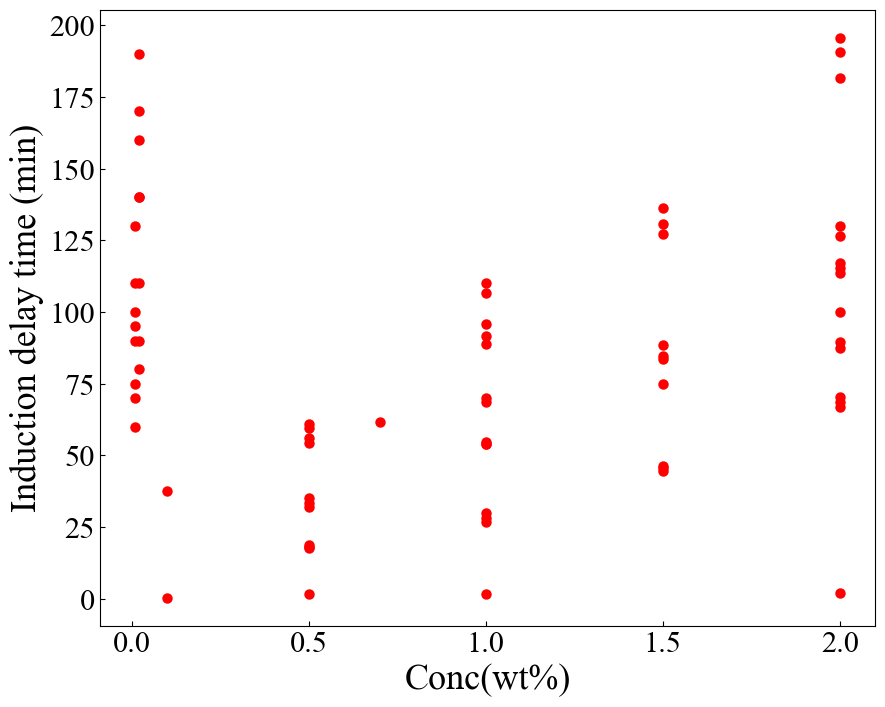

In [63]:
fig = fd.add_fig()
ax = fd.add_ax(fig)

fd.plot_scatter(ax,df_pvp["Conc(wt%)"],df_pvp["Induction delay time (min)"],
                xlabel="Conc(wt%)",ylabel="Induction delay time (min)")
# ax.set_xlim(-0.5,5.5)
plt.show()

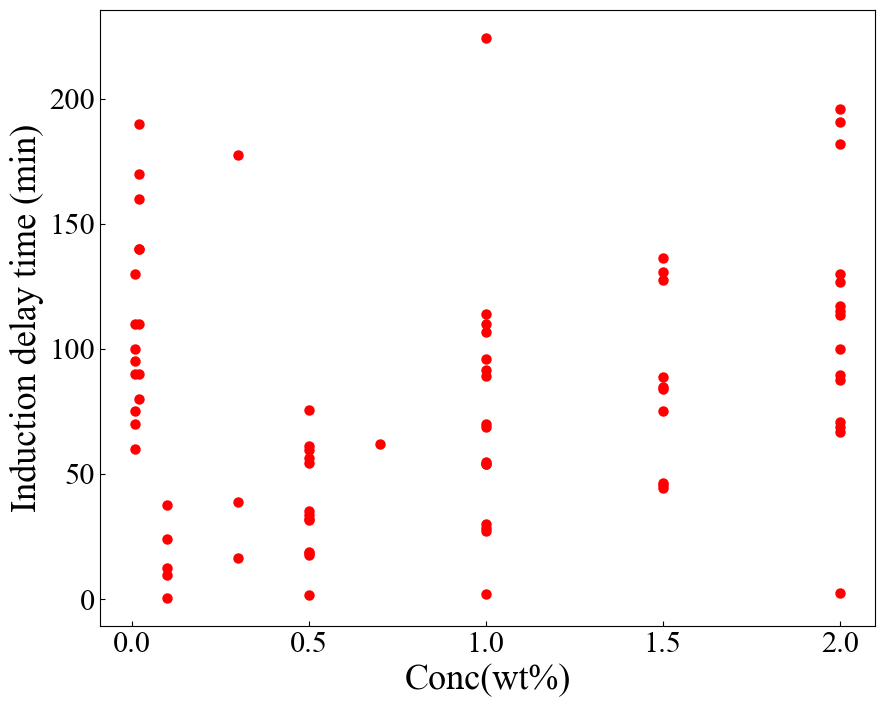

In [64]:
fig = fd.add_fig()
ax = fd.add_ax(fig)

fd.plot_scatter(ax,df_pvpc["Conc(wt%)"],df_pvpc["Induction delay time (min)"],
                xlabel="Conc(wt%)",ylabel="Induction delay time (min)")
# ax.set_xlim(-0.5,5.5)
plt.show()

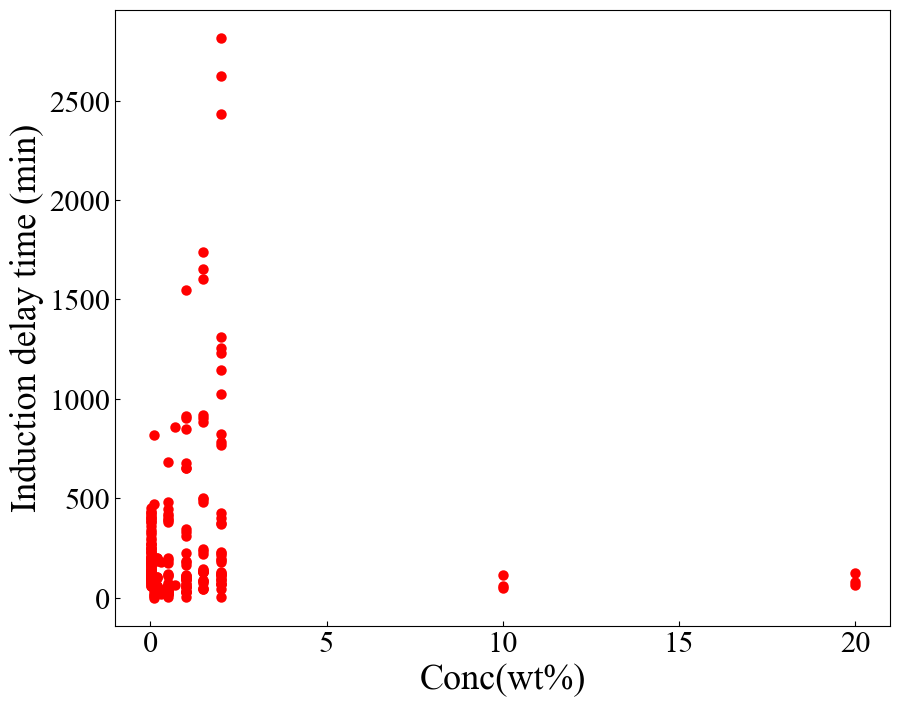

In [65]:
fig = fd.add_fig()
ax = fd.add_ax(fig)

fd.plot_scatter(ax,df_update["Conc(wt%)"],df_update["Induction delay time (min)"],
                xlabel="Conc(wt%)",ylabel="Induction delay time (min)")
# ax.set_xlim(-0.5,5.5)
plt.show()

In [70]:
!pip install pygraphviz